In [1]:
import pandas as pd

df = pd.read_csv("BI_Hackathon_Data.csv")
df.isna().sum()
#since some columns have too much missing value, we decide to delter those columns in analyzing
col = ['equalinc','nbgoodc','nbstatus','nbmedia','exbuscon','exreason','bafund','barel','TEAJOBGR','EB_JOBGR','EB_OWNER','TEAOWNER','TEAJOBNOW','EB_JOBNOW','TEACOMPET', 'EB_COMPET','TEANEWPR','EB_NEWPR','TEANEWTEC','EB_NEWTEC','TEAEXPORT','EB_EXPORT']
df = df.drop(columns = col)
print(df)
df.isna().sum()
missingcols = ['knowent','opport','suskill','fearfail', 'futsup','discent','busang','age9c','hhsize']
df = df.dropna( subset = missingcols)
df.isna().sum()
df.to_csv(r'D:\Data Analyst\Babson Hackathon\Hackathon.csv', index = False, header = True)
df.TEA.value_counts()

       yrsurv  WEIGHT_L  WEIGHT_A  GEMHHINC  knowent  opport  suskill  \
0        2011  1.415335  1.470729     68100      0.0    -1.0      0.0   
1        2011  0.971677  1.009707      3467      0.0    -1.0      1.0   
2        2011  2.545694  2.645328      3467      0.0     1.0     -1.0   
3        2011  0.971677  1.009707        33      1.0     1.0      0.0   
4        2011  1.319954  1.371615        -2      0.0     0.0      1.0   
...       ...       ...       ...       ...      ...     ...      ...   
28371    2017  0.942671  0.952578     68100      1.0     1.0      1.0   
28372    2017  1.206530  1.219210        33      0.0     1.0      0.0   
28373    2017  1.053133  1.064201     68100      1.0     1.0      1.0   
28374    2017  1.057164  1.068274        -2      0.0     0.0      0.0   
28375    2017  0.799854  0.808260      3467      0.0     1.0      0.0   

       fearfail  futsup  discent  ...  hhsize  ushhinc  usreduc  ESTBBUSO  \
0           0.0     0.0      0.0  ...     5.0 

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Data Analyst\\Babson Hackathon\\Hackathon.csv'

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

new_england = df[df['Region'] == 1 ]
new_york = df[df['Region'] == 2 ]
mid_atlantic = df[df['Region'] == 3 ]
southeast = df[df['Region'] == 4 ]
great_lakes = df[df['Region'] == 5 ]
south_central = df[df['Region'] == 6 ]
midwest = df[df['Region'] == 7 ]
mountain_plains = df[df['Region'] == 8 ]
pacific_southwest = df[df['Region'] == 9 ]
pacific_northwest = df[df['Region'] == 10 ]

'''
new_england.to_csv(r'D:\Data Analyst\Babson Hackathon\new_england.csv', index = False, header = True)
new_york.to_csv(r'D:\Data Analyst\Babson Hackathon\new_york.csv', index = False, header = True)
mid_atlantic.to_csv(r'D:\Data Analyst\Babson Hackathon\mid_atlantic.csv', index = False, header = True)
southeast.to_csv(r'D:\Data Analyst\Babson Hackathon\southeast.csv', index = False, header = True)
great_lakes.to_csv(r'D:\Data Analyst\Babson Hackathon\great_lakes.csv', index = False, header = True)
south_central.to_csv(r'D:\Data Analyst\Babson Hackathon\south_central.csv', index = False, header = True)
midwest.to_csv(r'D:\Data Analyst\Babson Hackathon\midwest.csv', index = False, header = True)
mountain_plains.to_csv(r'D:\Data Analyst\Babson Hackathon\mountain_plains.csv', index = False, header = True)
pacific_southwest.to_csv(r'D:\Data Analyst\Babson Hackathon\pacific_southwest.csv', index = False, header = True)
pacific_northwest.to_csv(r'D:\Data Analyst\Babson Hackathon\pacific_northwest.csv', index = False, header = True)
'''

"\nnew_england.to_csv(r'D:\\Data Analyst\\Babson Hackathon\new_england.csv', index = False, header = True)\nnew_york.to_csv(r'D:\\Data Analyst\\Babson Hackathon\new_york.csv', index = False, header = True)\nmid_atlantic.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\mid_atlantic.csv', index = False, header = True)\nsoutheast.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\southeast.csv', index = False, header = True)\ngreat_lakes.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\great_lakes.csv', index = False, header = True)\nsouth_central.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\south_central.csv', index = False, header = True)\nmidwest.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\midwest.csv', index = False, header = True)\nmountain_plains.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\mountain_plains.csv', index = False, header = True)\npacific_southwest.to_csv(r'D:\\Data Analyst\\Babson Hackathon\\pacific_southwest.csv', index = False, header = True)\npacific_northwest.to_csv(r'D:\\Data A

In [ ]:
#linear regression
new_england = pd.read_csv("new_england.csv")
new_england = new_england.drop(columns = ['Region','TEANEC','TEAOPP'])
model_ols = smf.ols("TEA ~ yrsurv+GEMHHINC+knowent+opport+suskill+fearfail+futsup+discent+busang+gender+age9c+hhsize+ushhinc+usreduc+ESTBBUSO+IPACTLD_ALL+race", data=new_england_without_weight).fit()
print(model_ols.summary())
 
 

NameError: name 'new_england_without_weight' is not defined

In [ ]:
#linear regression with weight
y=new_england['TEA']
new_cols = ['yrsurv','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
x=new_england[new_cols]

## add a intercept point
x = sm.add_constant(x)
 
## Compute the weight and add it to the column named "weight_1"
 
model_wls_1 = sm.WLS(y, x, new_england_without_weight['WEIGHT_A'])
mod_res_1 = model_wls_1.fit()
print(mod_res_1.summary())



                            WLS Regression Results                            
Dep. Variable:                    TEA   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     8.082
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.43e-19
Time:                        23:02:37   Log-Likelihood:                -217.29
No. Observations:                 980   AIC:                             470.6
Df Residuals:                     962   BIC:                             558.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.2033     10.913      0.935      

LightGBM Model accuracy score: 0.8810
Training-set accuracy score: 0.9519
Training set score: 0.9519
Test set score: 0.8810
Confusion matrix

 [[255  15]
 [ 20   4]]

True Positives(TP) =  255

True Negatives(TN) =  4

False Positives(FP) =  15

False Negatives(FN) =  20
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       270
           1       0.21      0.17      0.19        24

    accuracy                           0.88       294
   macro avg       0.57      0.56      0.56       294
weighted avg       0.87      0.88      0.87       294



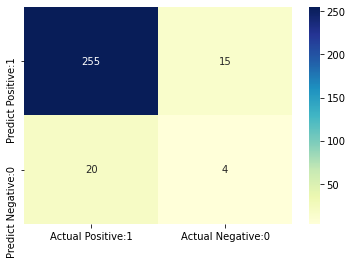

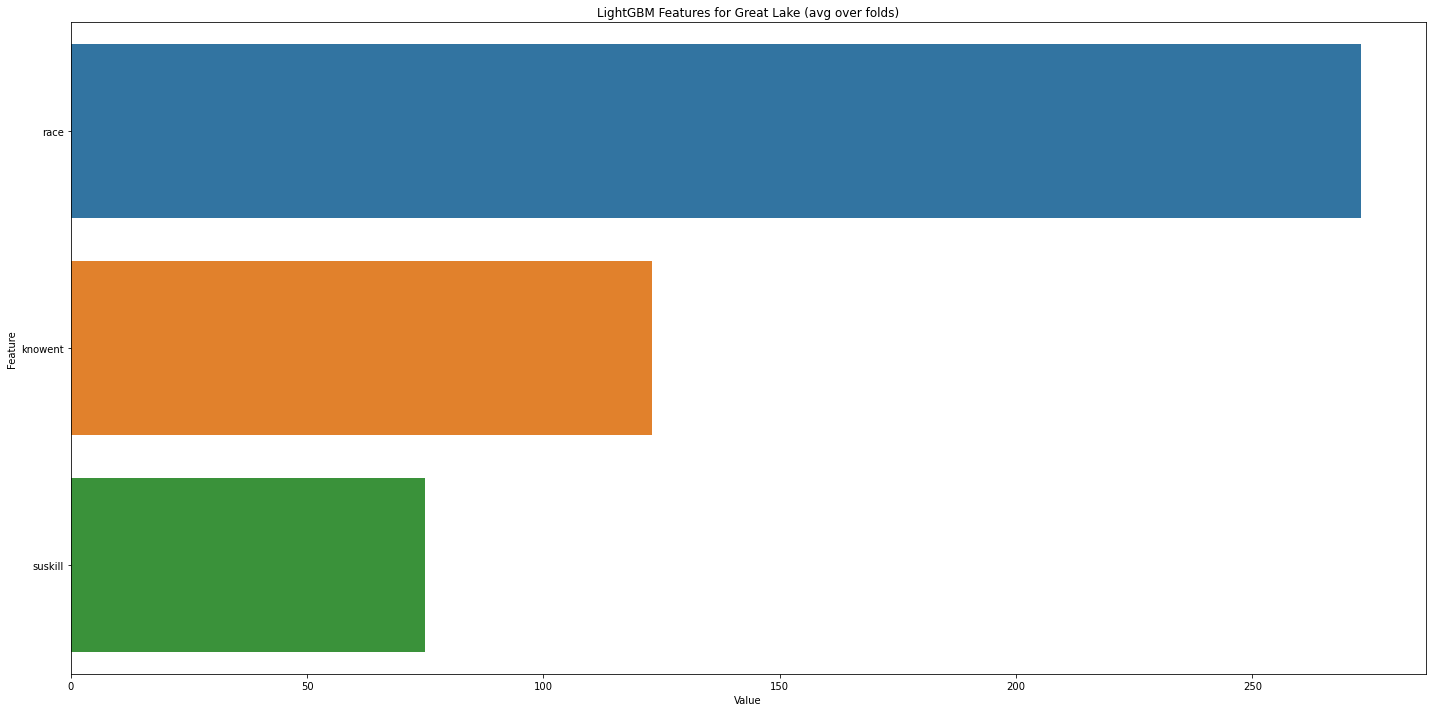

[ 123   75  273 2265]
          col_name
WEIGHT_A      2265
race           273
knowent        123
suskill         75


<Figure size 432x288 with 0 Axes>

In [15]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


#New England with Weight A
new_england = pd.read_csv("new_england.csv")
cols = ['TEA','knowent', 'suskill','race','WEIGHT_A']
new_england = new_england[cols]

new_england['TEA'].value_counts()


#Declare feature vector and target variable
y=new_england['TEA']

new_cols = ['knowent', 'suskill','race','WEIGHT_A']
x=new_england[new_cols]

feature_cols = ['knowent', 'suskill','race']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,new_england[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Great Lake (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

print(clf.feature_importances_)
feature_imporant = pd.DataFrame({'col_name': clf.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)
print(feature_imporant)




LightGBM Model accuracy score: 0.8810
Training-set accuracy score: 0.9446
Training set score: 0.9446
Test set score: 0.8810
Confusion matrix

 [[257  13]
 [ 22   2]]

True Positives(TP) =  257

True Negatives(TN) =  2

False Positives(FP) =  13

False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       270
           1       0.13      0.08      0.10        24

    accuracy                           0.88       294
   macro avg       0.53      0.52      0.52       294
weighted avg       0.86      0.88      0.87       294



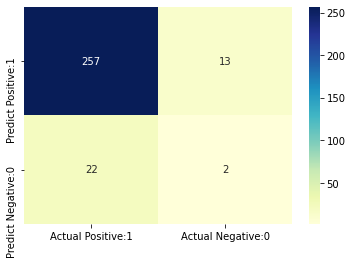

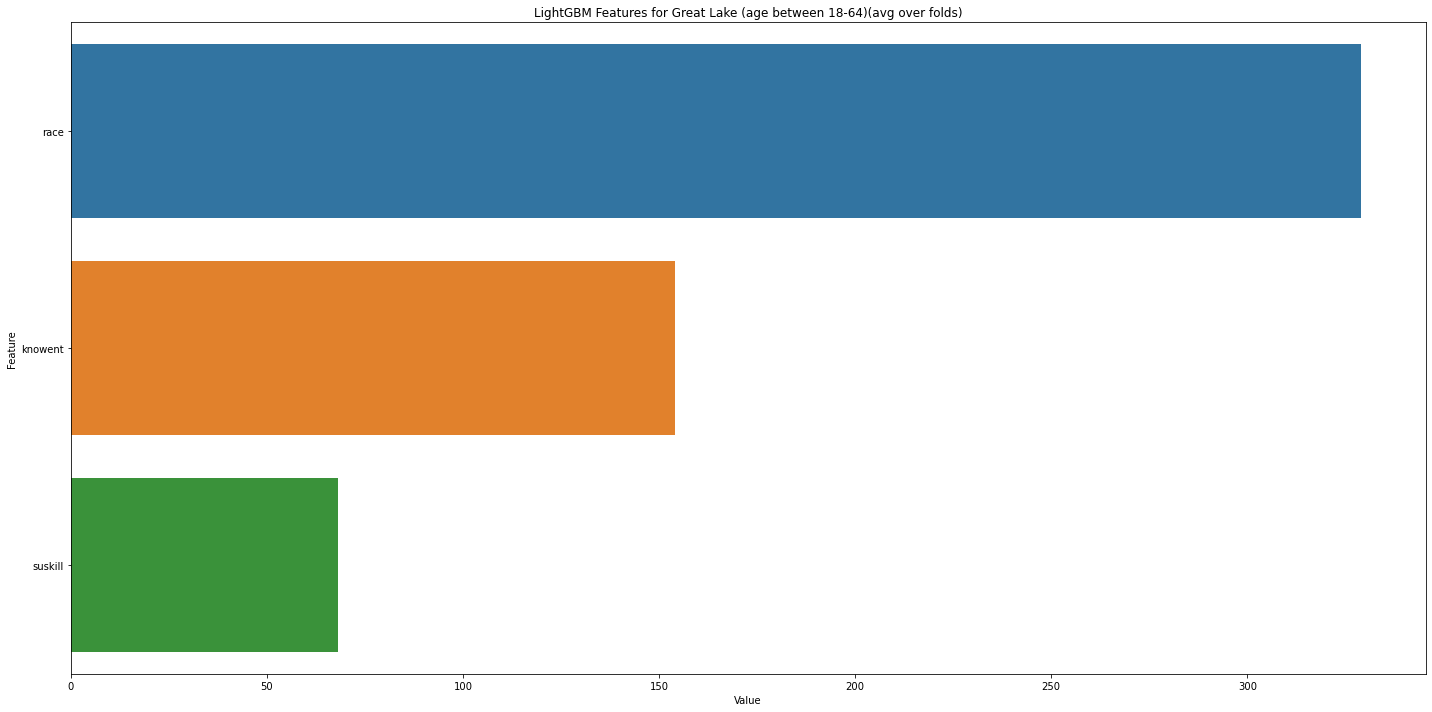

<Figure size 432x288 with 0 Axes>

In [17]:
#New England with weight L
new_england_weightL = pd.read_csv("new_england.csv")
cols = ['TEA','knowent', 'suskill','race','WEIGHT_L']
new_england_weightL = new_england_weightL[cols]
new_england_weightL['WEIGHT_L'] = new_england_weightL['WEIGHT_L'].fillna(0)


new_england_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=new_england_weightL['TEA']

new_cols = ['knowent', 'suskill','race','WEIGHT_L']
feature_cols =  ['knowent', 'suskill','race']
x=new_england_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,new_england_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Great Lake (age between 18-64)(avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')




LightGBM Model accuracy score: 0.8880
Training-set accuracy score: 0.9311
Training set score: 0.9311
Test set score: 0.8880
Confusion matrix

 [[1322   44]
 [ 126   26]]

True Positives(TP) =  1322

True Negatives(TN) =  26

False Positives(FP) =  44

False Negatives(FN) =  126
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1366
           1       0.37      0.17      0.23       152

    accuracy                           0.89      1518
   macro avg       0.64      0.57      0.59      1518
weighted avg       0.86      0.89      0.87      1518



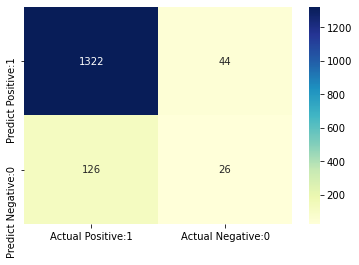

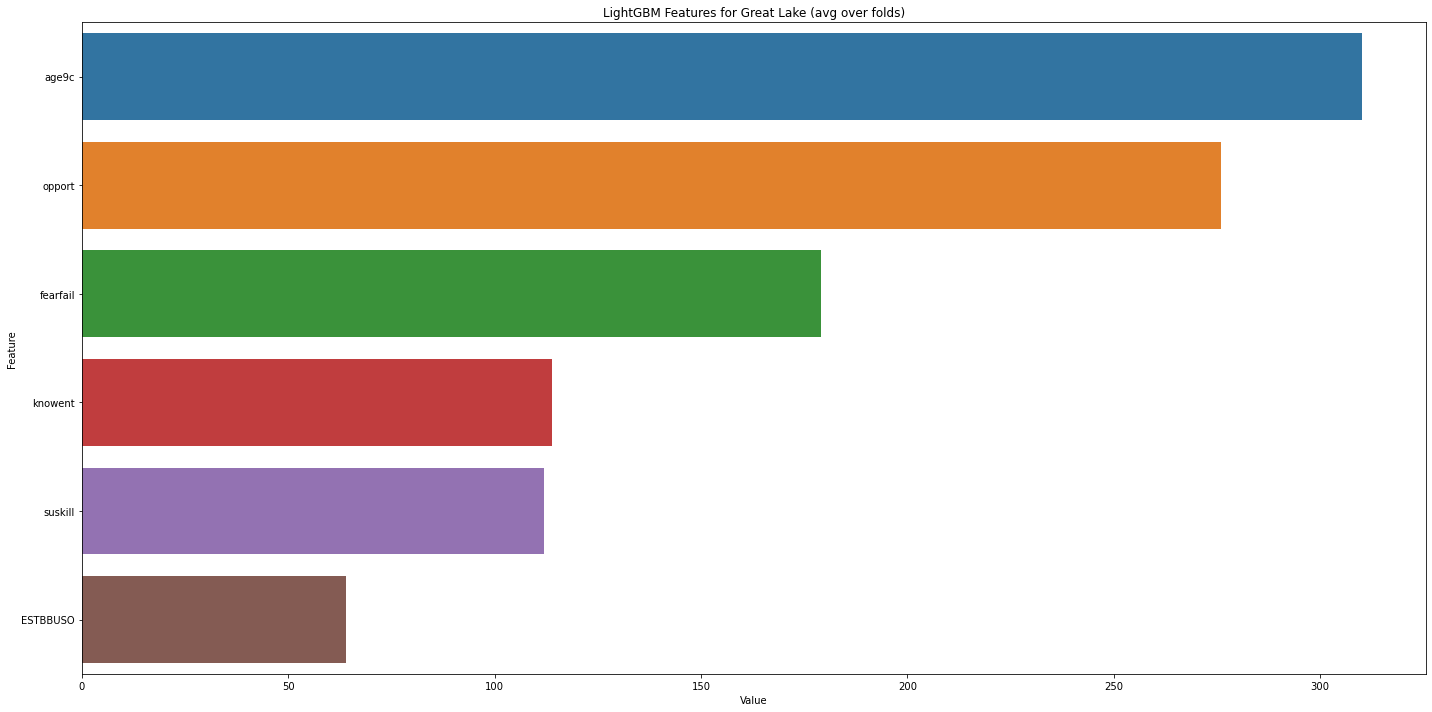

[ 114  112  310   64  276  179 1945]
          col_name
WEIGHT_A      1945
age9c          310
opport         276
fearfail       179
knowent        114
suskill        112
ESTBBUSO        64


<Figure size 432x288 with 0 Axes>

In [ ]:
#Great Lakes with Weight A
great_lakes = pd.read_csv("great_lakes.csv")
cols = ['TEA','knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_A']
great_lakes = great_lakes[cols]

great_lakes['TEA'].value_counts()


#Declare feature vector and target variable
y=great_lakes['TEA']

new_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_A']
x=great_lakes[new_cols]

feature_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,great_lakes[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Great Lake (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

print(clf.feature_importances_)
feature_imporant = pd.DataFrame({'col_name': clf.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)
print(feature_imporant)

LightGBM Model accuracy score: 0.8827
Training-set accuracy score: 0.9319
Training set score: 0.9319
Test set score: 0.8827
Confusion matrix

 [[1308   58]
 [ 120   32]]

True Positives(TP) =  1308

True Negatives(TN) =  32

False Positives(FP) =  58

False Negatives(FN) =  120
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1366
           1       0.36      0.21      0.26       152

    accuracy                           0.88      1518
   macro avg       0.64      0.58      0.60      1518
weighted avg       0.86      0.88      0.87      1518



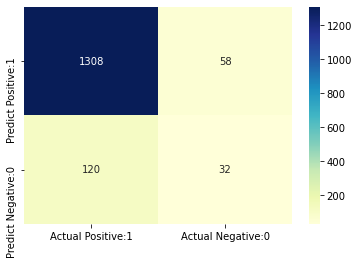

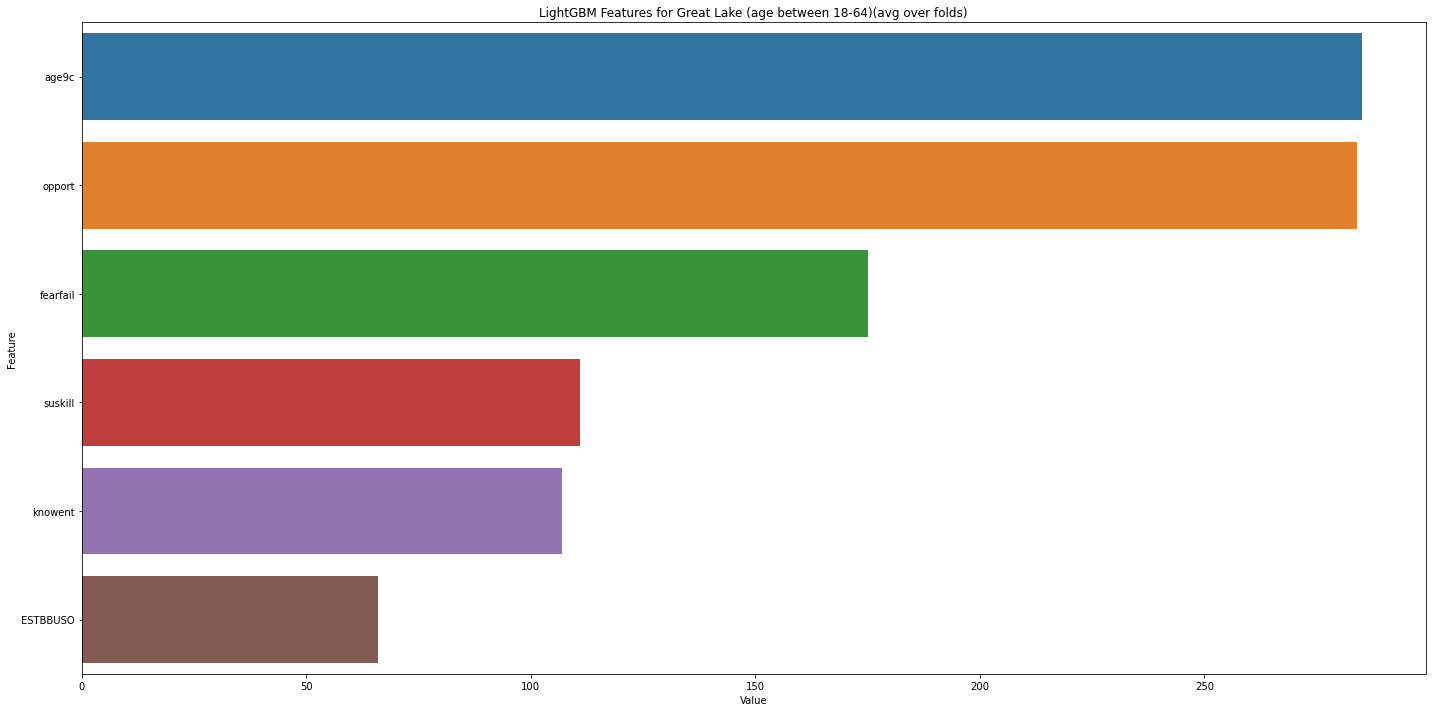

<Figure size 432x288 with 0 Axes>

In [ ]:
#Great Lake with weight L
great_lakes_weightL = pd.read_csv("great_lakes.csv")
cols = ['TEA','knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_L']
great_lakes_weightL = great_lakes_weightL[cols]
great_lakes_weightL['WEIGHT_L'] = great_lakes_weightL['WEIGHT_L'].fillna(0)


great_lakes_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=great_lakes_weightL['TEA']

new_cols = ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail','WEIGHT_L']
feature_cols =  ['knowent', 'suskill','age9c', 'ESTBBUSO','opport','fearfail']
x=great_lakes_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,great_lakes_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Great Lake (age between 18-64)(avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8666
Training-set accuracy score: 0.9131
Training set score: 0.9131
Test set score: 0.8666
Confusion matrix

 [[516  15]
 [ 66  10]]

True Positives(TP) =  516

True Negatives(TN) =  10

False Positives(FP) =  15

False Negatives(FN) =  66
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       531
           1       0.40      0.13      0.20        76

    accuracy                           0.87       607
   macro avg       0.64      0.55      0.56       607
weighted avg       0.83      0.87      0.84       607



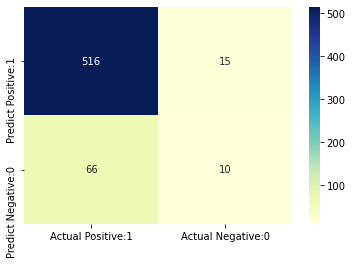

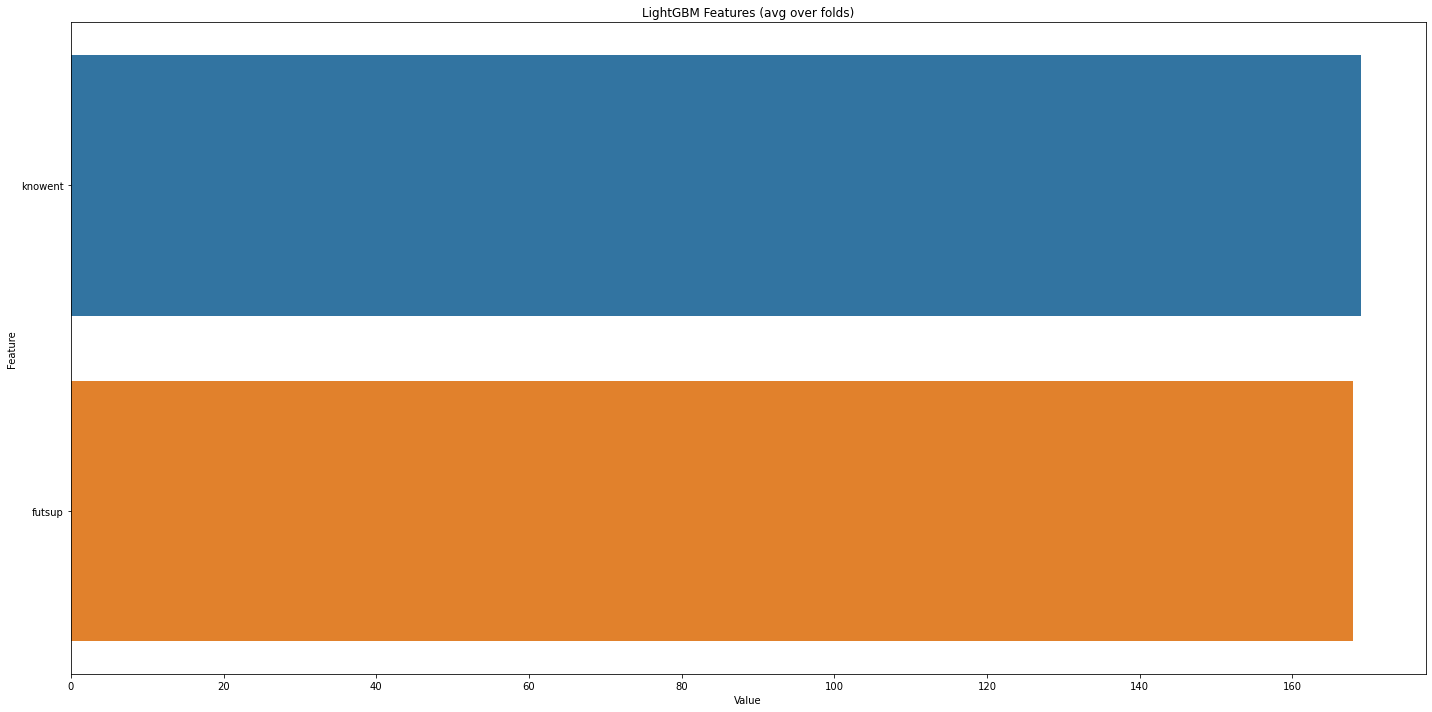

[ 168  169 2663]


<Figure size 432x288 with 0 Axes>

In [4]:
#Mid Atlantic with Weight A

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

mid_atlantic = pd.read_csv("mid_atlantic.csv")
cols = ['TEA','futsup', 'knowent','WEIGHT_A']

mid_atlantic = mid_atlantic[cols]
mid_atlantic['TEA'].value_counts()


#Declare feature vector and target variable
y=mid_atlantic['TEA']

new_cols = ['futsup', 'knowent','WEIGHT_A']
feature_cols = ['futsup','knowent']
x=mid_atlantic[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mid_atlantic[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


print(clf.feature_importances_)



LightGBM Model accuracy score: 0.8666
Training-set accuracy score: 0.9138
Training set score: 0.9138
Test set score: 0.8666
Confusion matrix

 [[514  17]
 [ 64  12]]

True Positives(TP) =  514

True Negatives(TN) =  12

False Positives(FP) =  17

False Negatives(FN) =  64
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       531
           1       0.41      0.16      0.23        76

    accuracy                           0.87       607
   macro avg       0.65      0.56      0.58       607
weighted avg       0.83      0.87      0.84       607



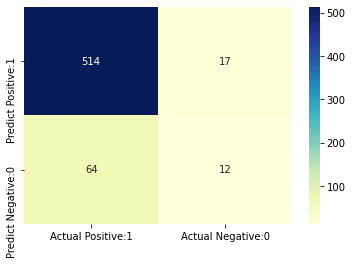

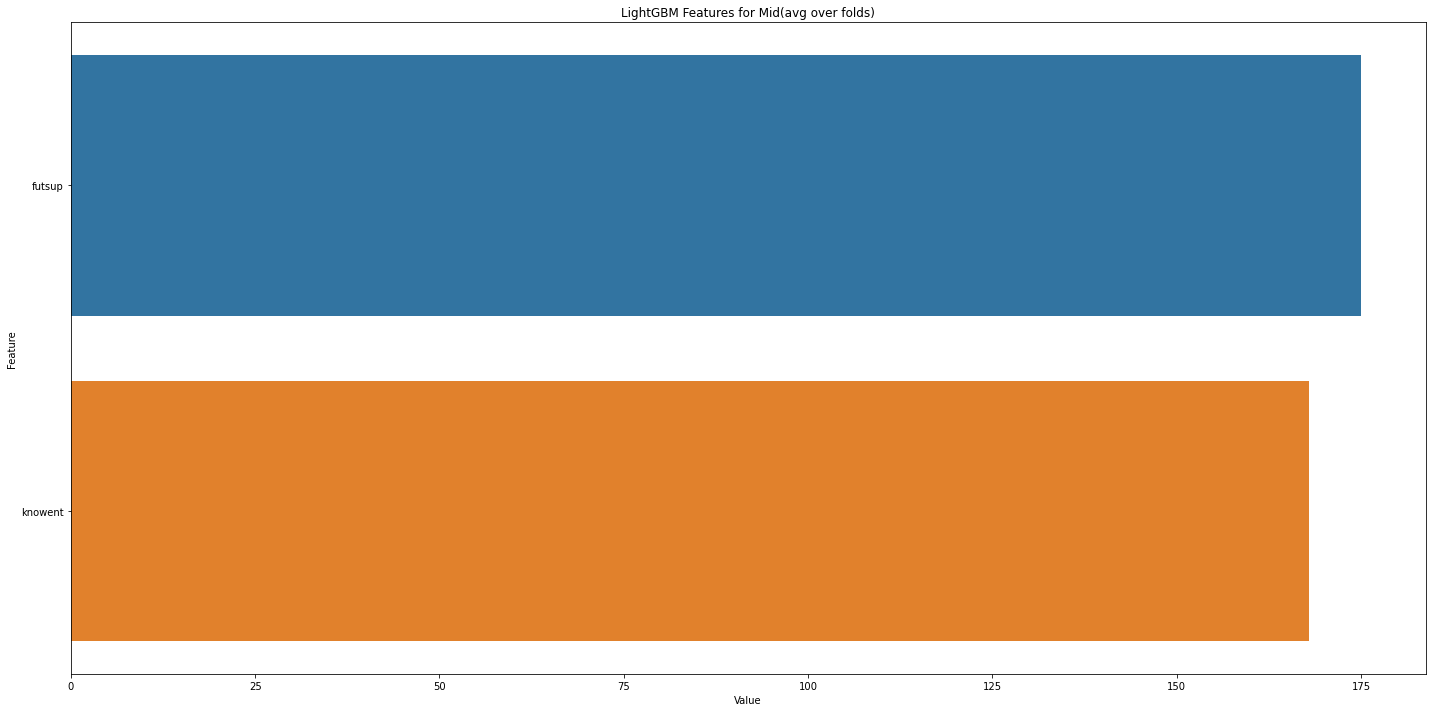

<Figure size 432x288 with 0 Axes>

In [6]:
#Mid atlantic with weight L
mid_atlantic_weightL = pd.read_csv("mid_atlantic.csv")
cols = ['TEA','futsup', 'knowent','WEIGHT_L']
mid_atlantic_weightL = mid_atlantic_weightL[cols]
mid_atlantic_weightL['WEIGHT_L'] = mid_atlantic_weightL['WEIGHT_L'].fillna(0)


mid_atlantic_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=mid_atlantic_weightL['TEA']

new_cols = ['futsup', 'knowent','WEIGHT_L']
feature_cols = ['futsup', 'knowent']
x=mid_atlantic_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mid_atlantic_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Mid(avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8853
Training-set accuracy score: 0.9276
Training set score: 0.9276
Test set score: 0.8853
Confusion matrix

 [[246   7]
 [ 25   1]]

True Positives(TP) =  246

True Negatives(TN) =  1

False Positives(FP) =  7

False Negatives(FN) =  25
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       253
           1       0.12      0.04      0.06        26

    accuracy                           0.89       279
   macro avg       0.52      0.51      0.50       279
weighted avg       0.83      0.89      0.86       279



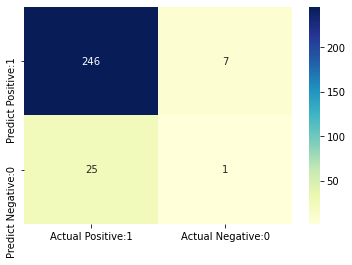

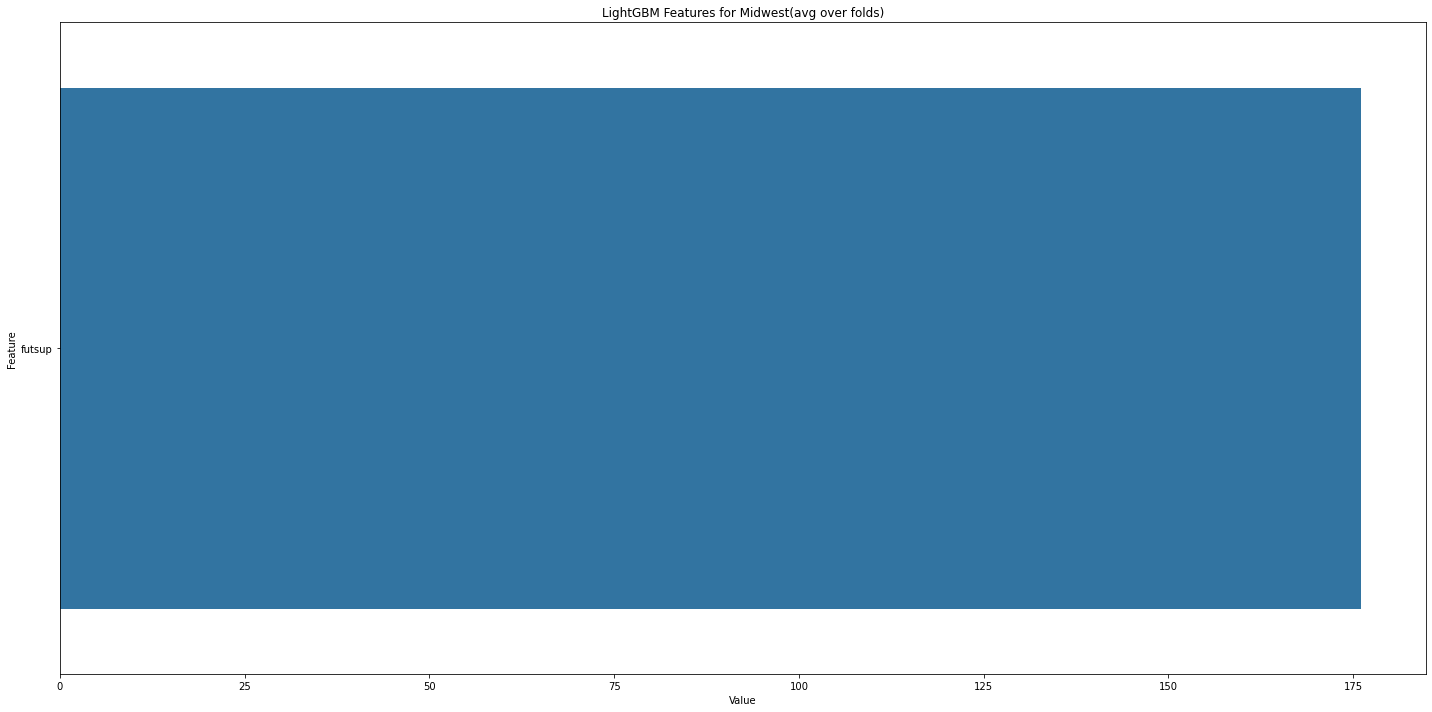

<Figure size 432x288 with 0 Axes>

In [8]:
#Mid west with Weight A

mid_west = pd.read_csv("midwest.csv")
cols = ['TEA','futsup','WEIGHT_A']

mid_west = mid_west[cols]
mid_west['TEA'].value_counts()


#Declare feature vector and target variable
y=mid_west['TEA']

new_cols = ['futsup','WEIGHT_A']
feature_cols = ['futsup']
x=mid_west[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mid_west[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest(avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')




LightGBM Model accuracy score: 0.8925
Training-set accuracy score: 0.9291
Training set score: 0.9291
Test set score: 0.8925
Confusion matrix

 [[245   8]
 [ 22   4]]

True Positives(TP) =  245

True Negatives(TN) =  4

False Positives(FP) =  8

False Negatives(FN) =  22
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       253
           1       0.33      0.15      0.21        26

    accuracy                           0.89       279
   macro avg       0.63      0.56      0.58       279
weighted avg       0.86      0.89      0.87       279



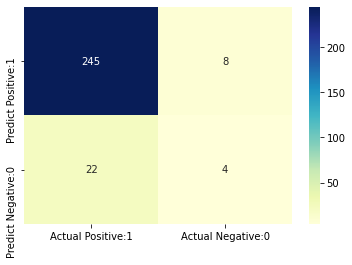

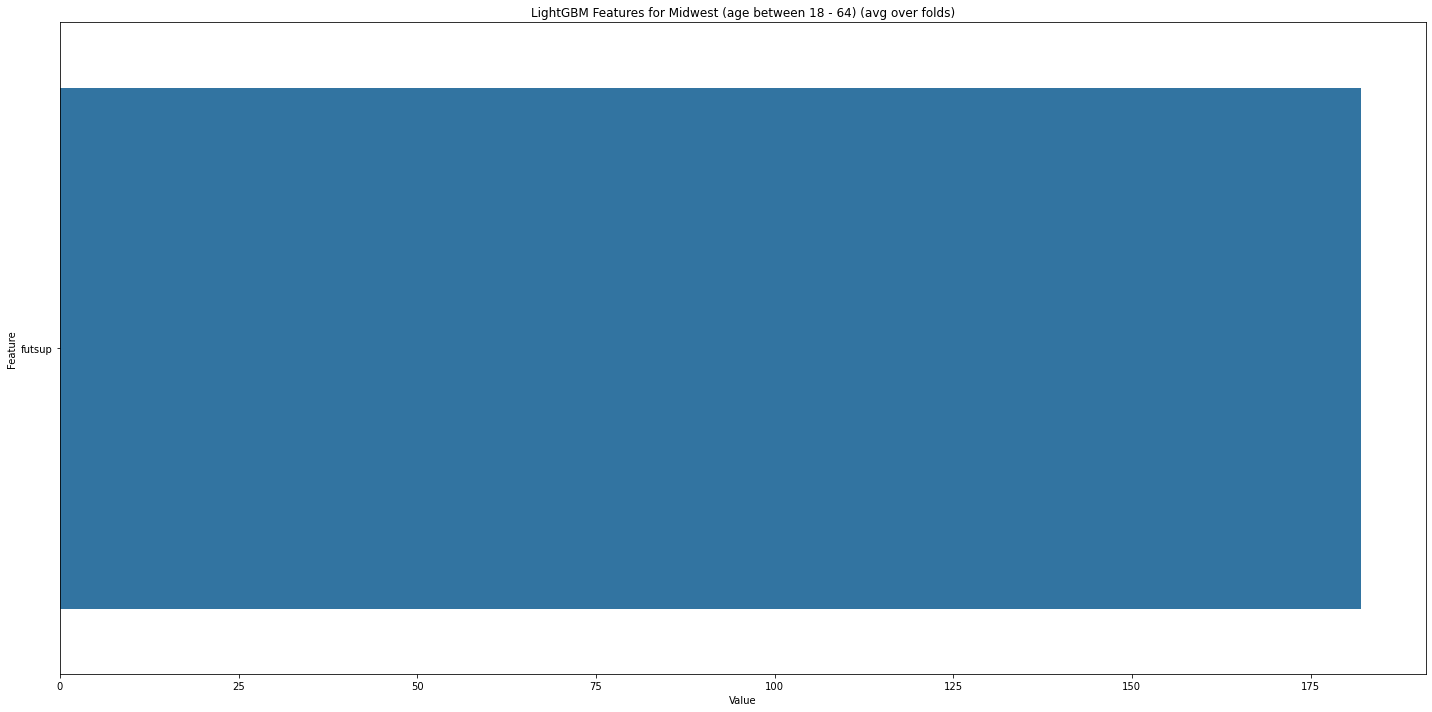

<Figure size 432x288 with 0 Axes>

In [9]:
#Midwest with weight L
Midwest_weightL = pd.read_csv("midwest.csv")
cols = ['TEA','futsup','WEIGHT_L']
Midwest_weightL = Midwest_weightL[cols]
Midwest_weightL['WEIGHT_L'] = Midwest_weightL['WEIGHT_L'].fillna(0)


Midwest_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=Midwest_weightL['TEA']

new_cols = ['futsup','WEIGHT_L']
feature_cols = ['futsup']
x=Midwest_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,Midwest_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8789
Training-set accuracy score: 0.9537
Training set score: 0.9537
Test set score: 0.8789
Confusion matrix

 [[185  13]
 [ 14  11]]

True Positives(TP) =  185

True Negatives(TN) =  11

False Positives(FP) =  13

False Negatives(FN) =  14
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       198
           1       0.46      0.44      0.45        25

    accuracy                           0.88       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.88      0.88      0.88       223



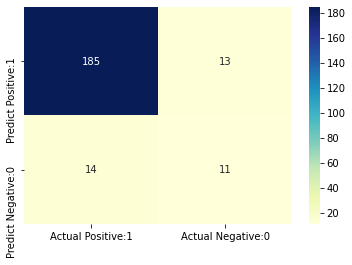

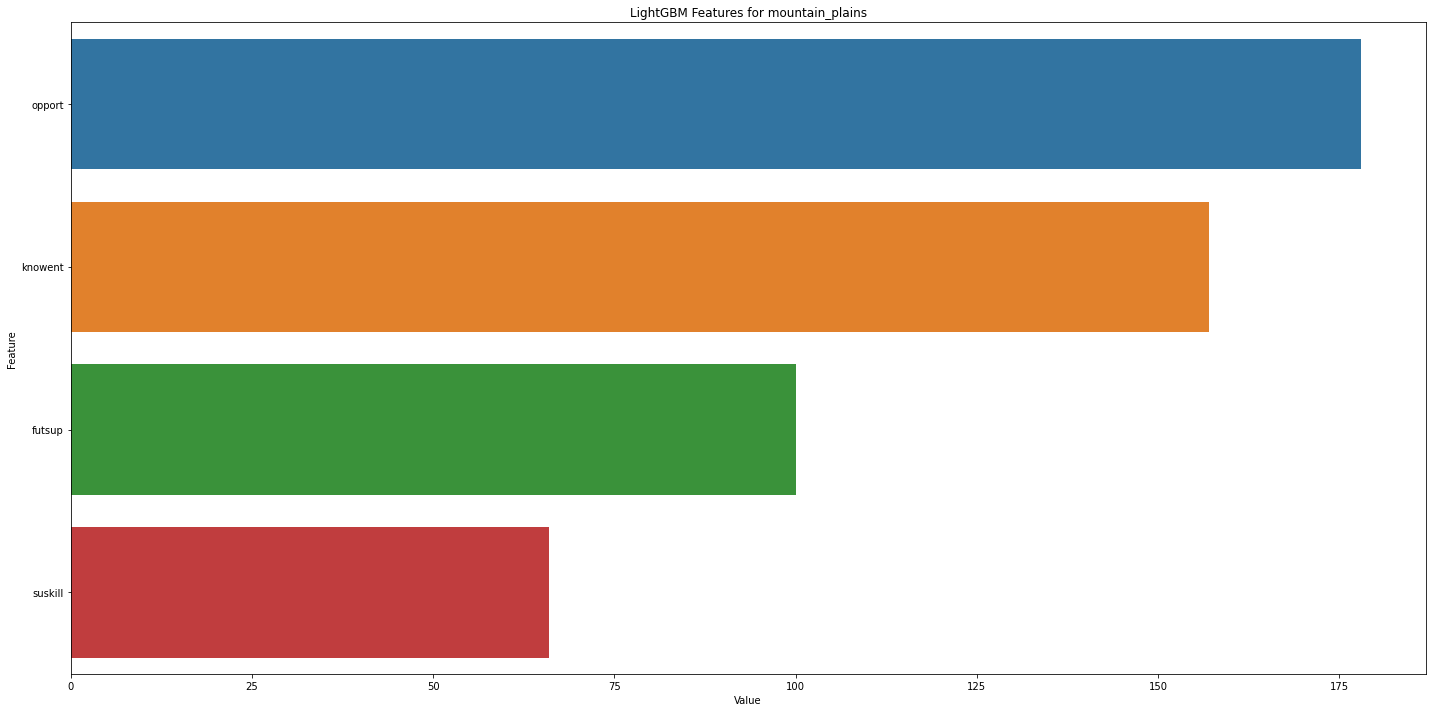

<Figure size 432x288 with 0 Axes>

In [10]:
#Mountain with Weight A

mountain_plains = pd.read_csv("mountain_plains.csv")
cols = ['TEA','knowent', 'suskill', 'futsup','opport','WEIGHT_A']

mountain_plains = mountain_plains[cols]
mountain_plains['TEA'].value_counts()


#Declare feature vector and target variable
y=mountain_plains['TEA']

new_cols = ['knowent', 'suskill', 'futsup','opport','WEIGHT_A']
feature_cols = [ 'knowent', 'suskill', 'futsup','opport']
x=mountain_plains[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mountain_plains[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for mountain_plains')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')




LightGBM Model accuracy score: 0.8565
Training-set accuracy score: 0.9517
Training set score: 0.9517
Test set score: 0.8565
Confusion matrix

 [[185  13]
 [ 19   6]]

True Positives(TP) =  185

True Negatives(TN) =  6

False Positives(FP) =  13

False Negatives(FN) =  19
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       198
           1       0.32      0.24      0.27        25

    accuracy                           0.86       223
   macro avg       0.61      0.59      0.60       223
weighted avg       0.84      0.86      0.85       223



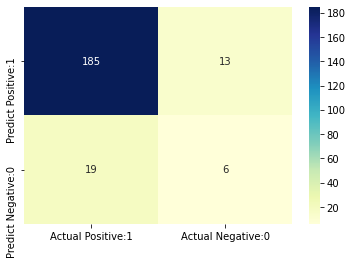

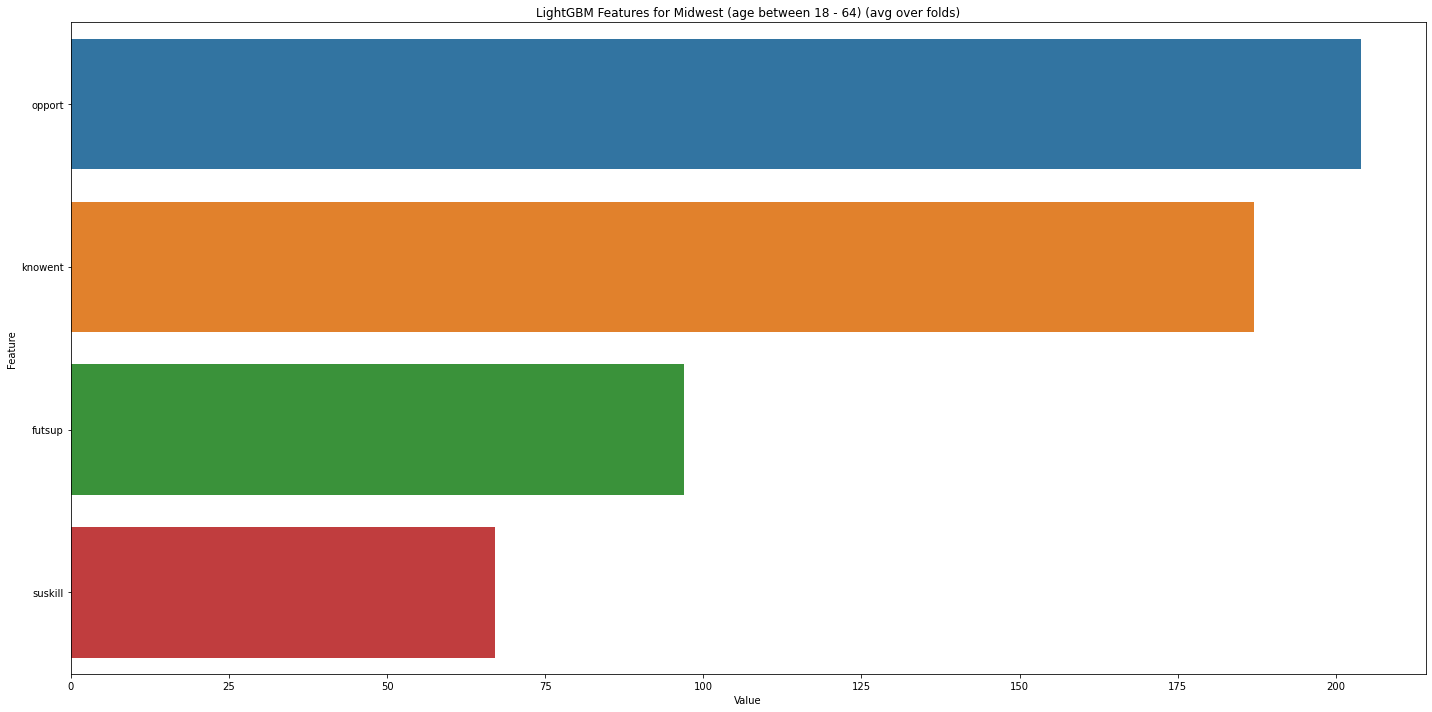

<Figure size 432x288 with 0 Axes>

In [11]:
#Mountain with weight L
mountain_plains_weightL = pd.read_csv("mountain_plains.csv")
cols = ['TEA','knowent','suskill','futsup','opport','WEIGHT_L']
mountain_plains_weightL = mountain_plains_weightL[cols]
mountain_plains_weightL['WEIGHT_L'] = mountain_plains_weightL['WEIGHT_L'].fillna(0)


mountain_plains_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=mountain_plains_weightL['TEA']

new_cols = ['knowent','suskill','futsup','opport','WEIGHT_L']
feature_cols = ['knowent','suskill','futsup','opport']
x=mountain_plains_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,mountain_plains_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8851
Training-set accuracy score: 0.9166
Training set score: 0.9166
Test set score: 0.8851
Confusion matrix

 [[820  30]
 [ 78  12]]

True Positives(TP) =  820

True Negatives(TN) =  12

False Positives(FP) =  30

False Negatives(FN) =  78
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       850
           1       0.29      0.13      0.18        90

    accuracy                           0.89       940
   macro avg       0.60      0.55      0.56       940
weighted avg       0.85      0.89      0.87       940



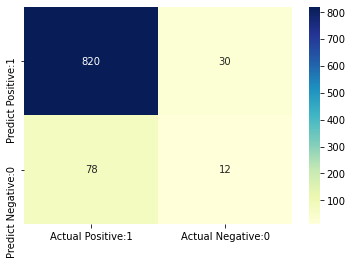

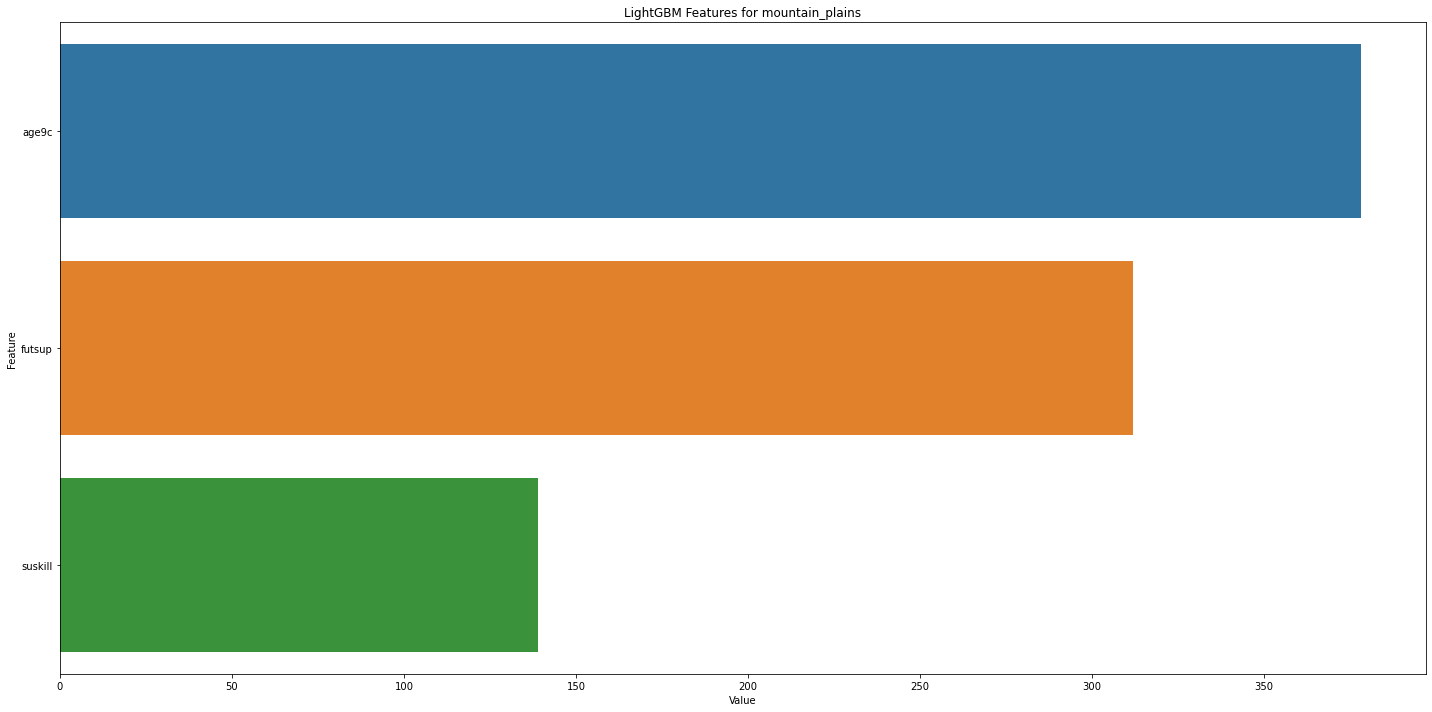

<Figure size 432x288 with 0 Axes>

In [12]:
#new york with Weight A

new_york = pd.read_csv("new_york.csv")
cols = ['TEA','age9c', 'suskill', 'futsup','WEIGHT_A']

new_york = new_york[cols]
new_york['TEA'].value_counts()


#Declare feature vector and target variable
y=new_york['TEA']

new_cols = ['age9c', 'suskill', 'futsup','WEIGHT_A']
feature_cols = ['age9c', 'suskill', 'futsup']
x=new_york[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,new_york[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for mountain_plains')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')




LightGBM Model accuracy score: 0.8851
Training-set accuracy score: 0.9152
Training set score: 0.9152
Test set score: 0.8851
Confusion matrix

 [[821  29]
 [ 79  11]]

True Positives(TP) =  821

True Negatives(TN) =  11

False Positives(FP) =  29

False Negatives(FN) =  79
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       850
           1       0.28      0.12      0.17        90

    accuracy                           0.89       940
   macro avg       0.59      0.54      0.55       940
weighted avg       0.85      0.89      0.86       940



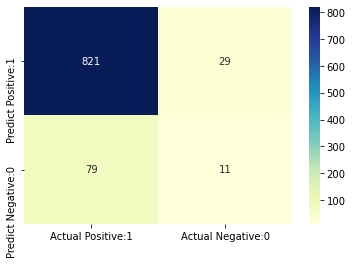

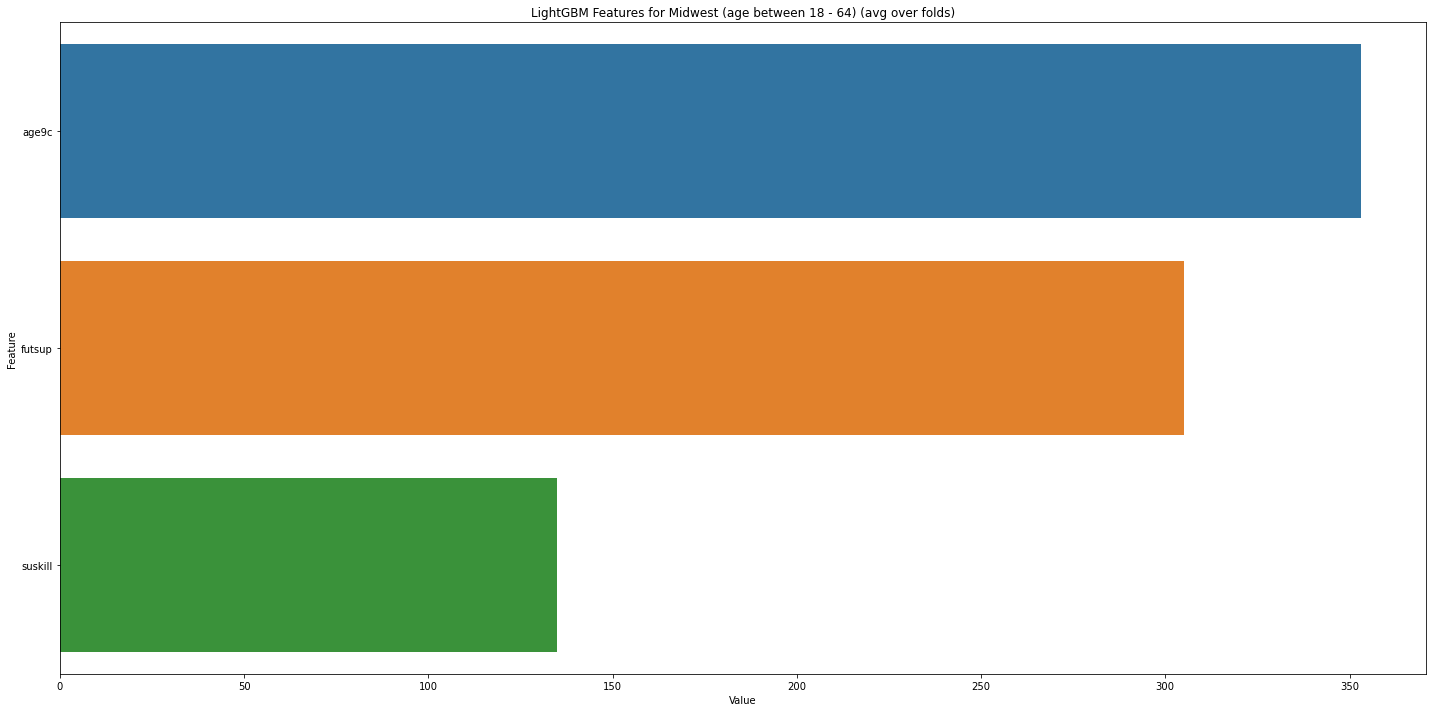

<Figure size 432x288 with 0 Axes>

In [13]:
#new york with weight L
new_york_weightL = pd.read_csv("new_york.csv")
cols = ['TEA','age9c','suskill','futsup','WEIGHT_L']
new_york_weightL = new_york_weightL[cols]
new_york_weightL['WEIGHT_L'] = new_york_weightL['WEIGHT_L'].fillna(0)


new_york_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=new_york_weightL['TEA']

new_cols = ['age9c','suskill','futsup','WEIGHT_L']
feature_cols = ['age9c','suskill','futsup']
x=new_york_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,new_york_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8554
Training-set accuracy score: 0.9294
Training set score: 0.9294
Test set score: 0.8554
Confusion matrix

 [[867  40]
 [112  32]]

True Positives(TP) =  867

True Negatives(TN) =  32

False Positives(FP) =  40

False Negatives(FN) =  112
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       907
           1       0.44      0.22      0.30       144

    accuracy                           0.86      1051
   macro avg       0.67      0.59      0.61      1051
weighted avg       0.83      0.86      0.83      1051



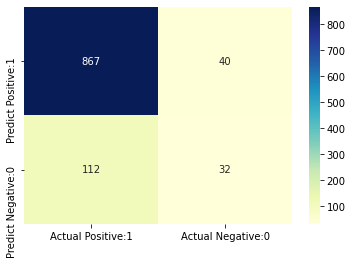

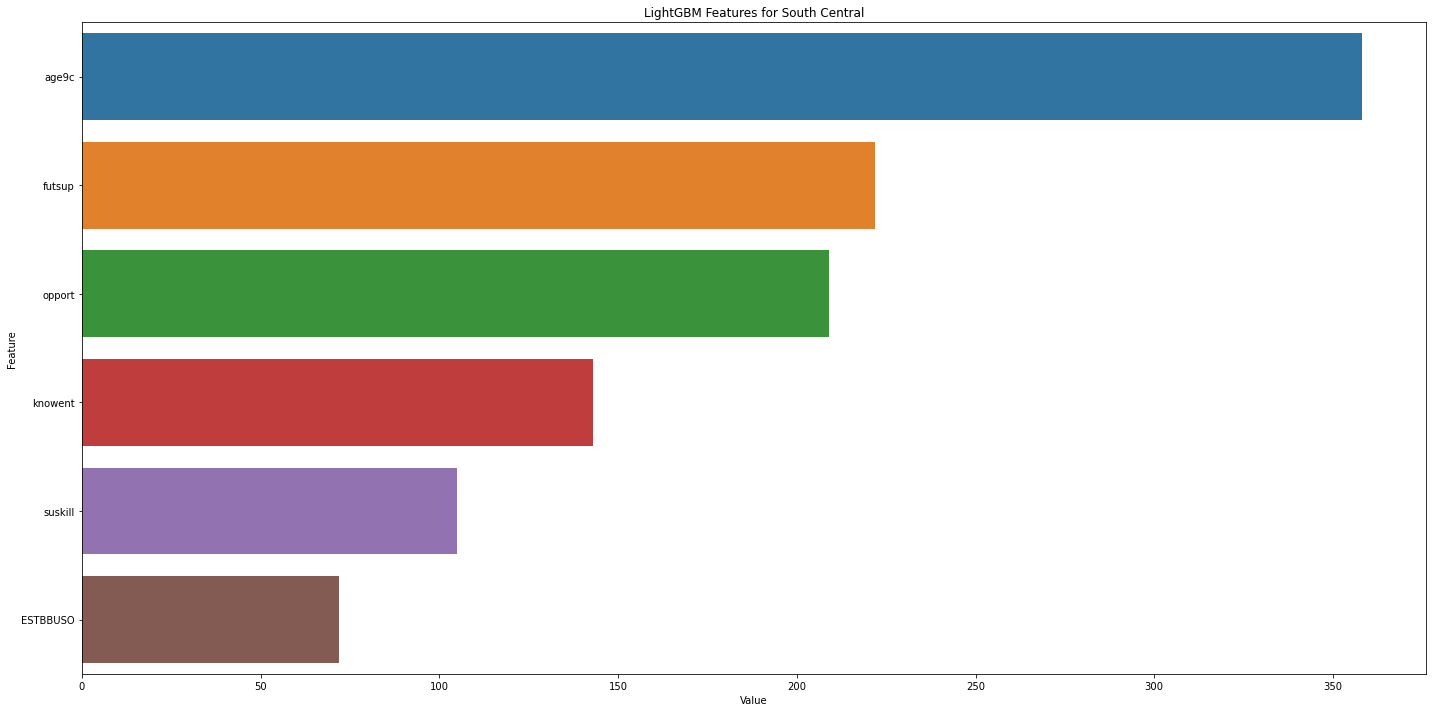

<Figure size 432x288 with 0 Axes>

In [18]:
#south central with weight A

south_central = pd.read_csv("south_central.csv")
cols = ['TEA','age9c', 'suskill', 'futsup','knowent','ESTBBUSO','opport','WEIGHT_A']

south_central = south_central[cols]
south_central['TEA'].value_counts()


#Declare feature vector and target variable
y=south_central['TEA']

new_cols = ['age9c', 'suskill', 'futsup','knowent','ESTBBUSO','opport','WEIGHT_A']
feature_cols = ['age9c', 'suskill', 'futsup','knowent','ESTBBUSO','opport']
x=south_central[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,south_central[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for South Central')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


LightGBM Model accuracy score: 0.8544
Training-set accuracy score: 0.9262
Training set score: 0.9262
Test set score: 0.8544
Confusion matrix

 [[866  41]
 [112  32]]

True Positives(TP) =  866

True Negatives(TN) =  32

False Positives(FP) =  41

False Negatives(FN) =  112
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       907
           1       0.44      0.22      0.29       144

    accuracy                           0.85      1051
   macro avg       0.66      0.59      0.61      1051
weighted avg       0.82      0.85      0.83      1051



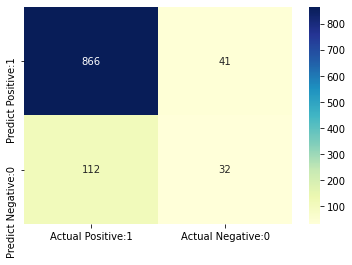

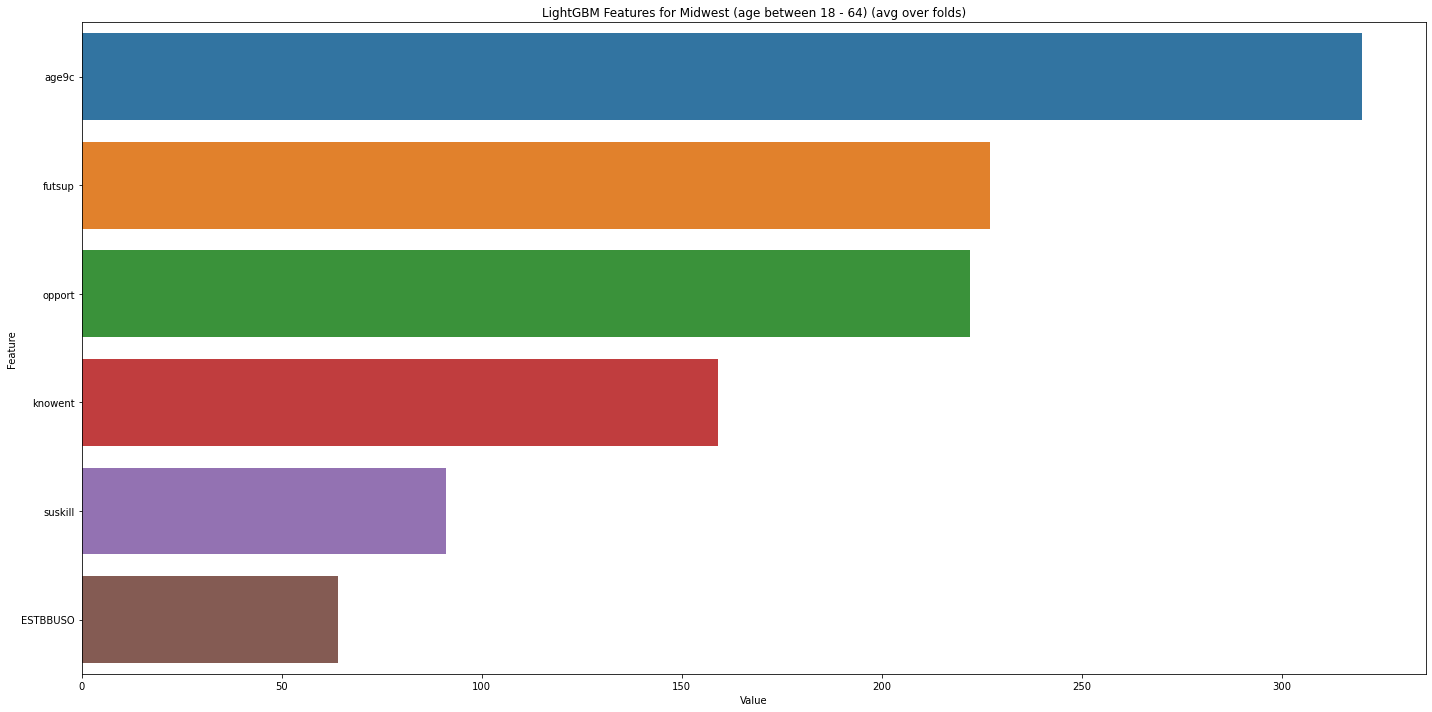

<Figure size 432x288 with 0 Axes>

In [20]:
#south central with weight L

south_central_weightL = pd.read_csv("south_central.csv")

cols = ['TEA','age9c', 'suskill', 'futsup','knowent','ESTBBUSO','opport','WEIGHT_L']
south_central_weightL = south_central_weightL[cols]
south_central_weightL['WEIGHT_L'] = south_central_weightL['WEIGHT_L'].fillna(0)


south_central_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=south_central_weightL['TEA']

new_cols = ['age9c', 'suskill', 'futsup','knowent','ESTBBUSO','opport','WEIGHT_L']
feature_cols = ['age9c', 'suskill', 'futsup','knowent','ESTBBUSO','opport']
x=south_central_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,south_central_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8646
Training-set accuracy score: 0.9054
Training set score: 0.9054
Test set score: 0.8646
Confusion matrix

 [[1215   45]
 [ 149   24]]

True Positives(TP) =  1215

True Negatives(TN) =  24

False Positives(FP) =  45

False Negatives(FN) =  149
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1260
           1       0.35      0.14      0.20       173

    accuracy                           0.86      1433
   macro avg       0.62      0.55      0.56      1433
weighted avg       0.83      0.86      0.84      1433



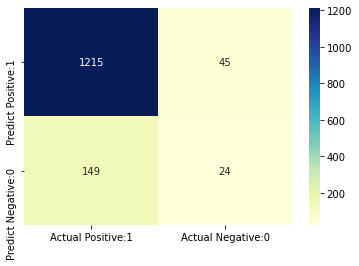

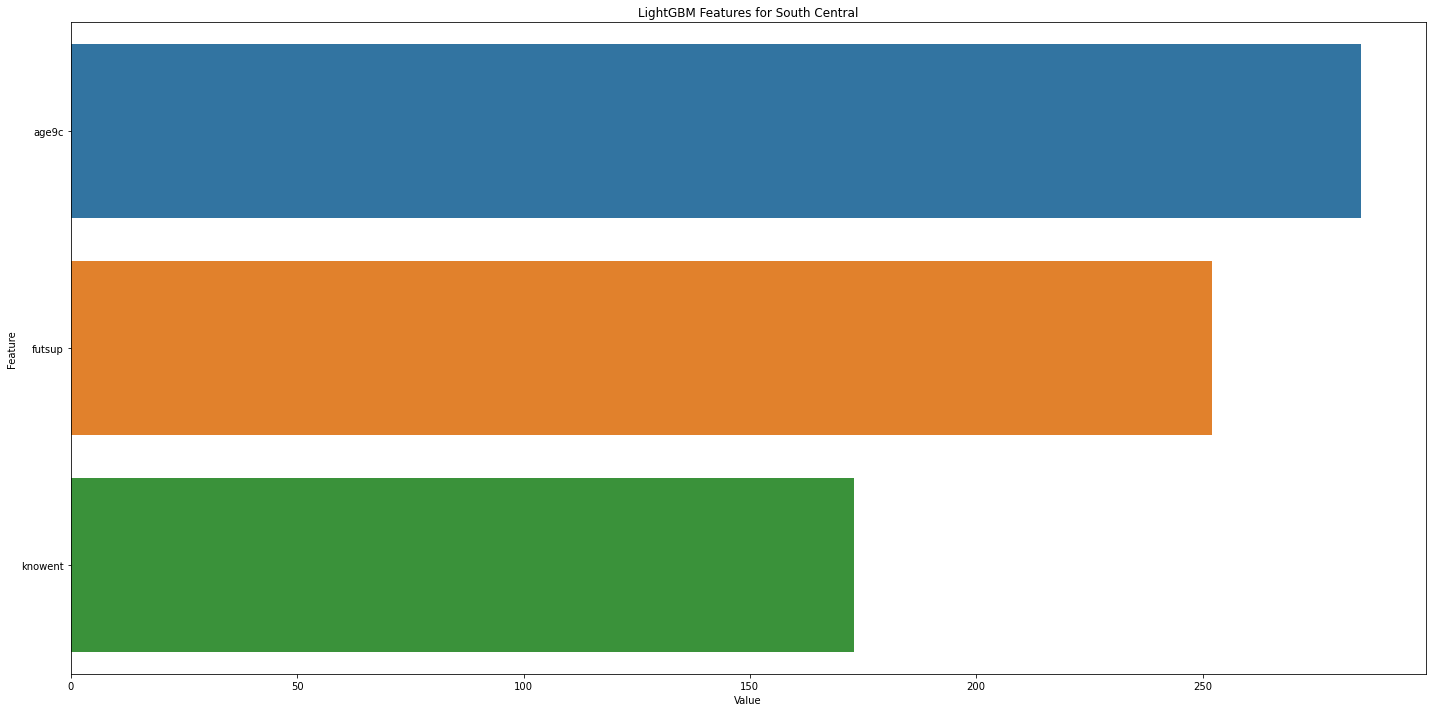

<Figure size 432x288 with 0 Axes>

In [22]:
#south east with weight A

south_east = pd.read_csv("southeast.csv")
cols = ['TEA','age9c', 'futsup','knowent','WEIGHT_A']

south_east = south_east[cols]
south_east['TEA'].value_counts()


#Declare feature vector and target variable
y=south_east['TEA']

new_cols =  ['age9c', 'futsup','knowent','WEIGHT_A']
feature_cols = ['age9c', 'futsup','knowent']

x=south_east[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,south_east[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for South East')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


LightGBM Model accuracy score: 0.8611
Training-set accuracy score: 0.9078
Training set score: 0.9078
Test set score: 0.8611
Confusion matrix

 [[1208   52]
 [ 147   26]]

True Positives(TP) =  1208

True Negatives(TN) =  26

False Positives(FP) =  52

False Negatives(FN) =  147
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1260
           1       0.33      0.15      0.21       173

    accuracy                           0.86      1433
   macro avg       0.61      0.55      0.57      1433
weighted avg       0.82      0.86      0.84      1433



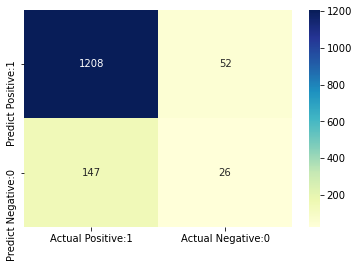

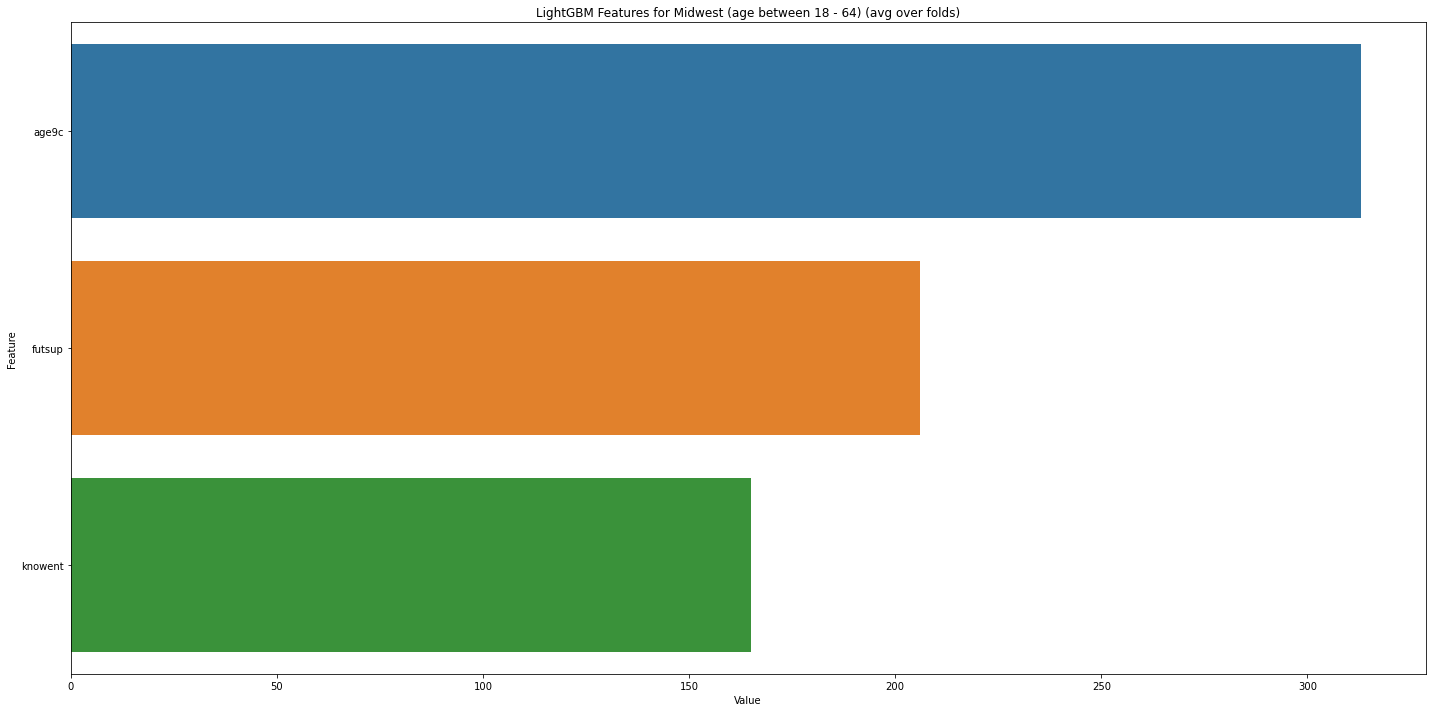

<Figure size 432x288 with 0 Axes>

In [23]:
#south east with weight L

south_east_weightL = pd.read_csv("southeast.csv")

cols = ['TEA','age9c', 'futsup','knowent','WEIGHT_L']
south_east_weightL = south_east_weightL[cols]
south_east_weightL['WEIGHT_L'] = south_east_weightL['WEIGHT_L'].fillna(0)


south_east_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=south_east_weightL['TEA']

new_cols = ['age9c', 'futsup','knowent','WEIGHT_L']
feature_cols = ['age9c', 'futsup','knowent']
x=south_east_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,south_east_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8664
Training-set accuracy score: 0.9427
Training set score: 0.9427
Test set score: 0.8664
Confusion matrix

 [[232  13]
 [ 24   8]]

True Positives(TP) =  232

True Negatives(TN) =  8

False Positives(FP) =  13

False Negatives(FN) =  24
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       245
           1       0.38      0.25      0.30        32

    accuracy                           0.87       277
   macro avg       0.64      0.60      0.61       277
weighted avg       0.85      0.87      0.85       277



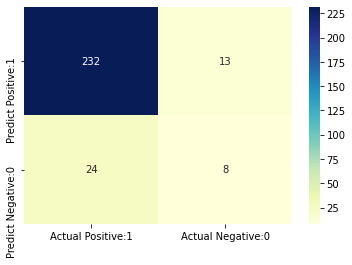

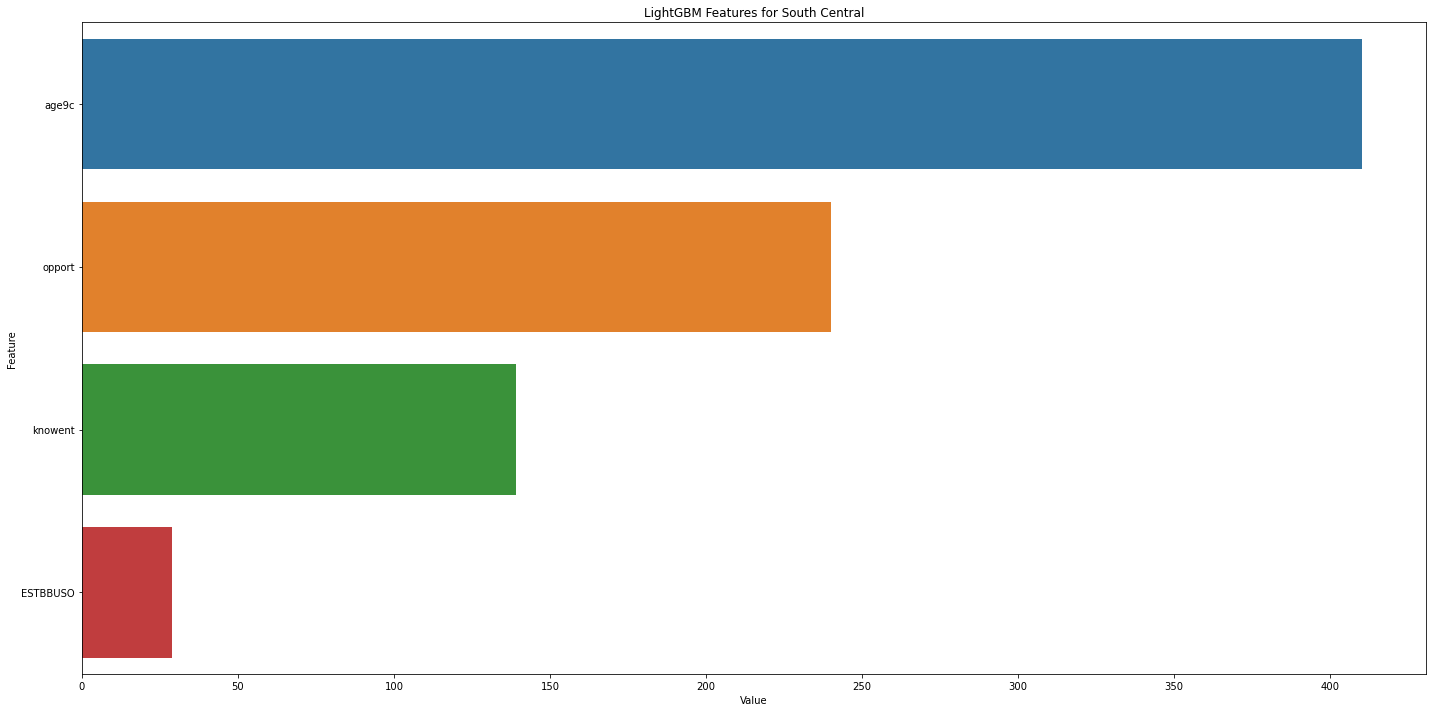

<Figure size 432x288 with 0 Axes>

In [24]:
#pacific northwest with weight A


pacific_northwest = pd.read_csv("pacific_northwest.csv")
cols = ['TEA','ESTBBUSO', 'age9c','knowent','opport','WEIGHT_A']

pacific_northwest = pacific_northwest[cols]
pacific_northwest['TEA'].value_counts()


#Declare feature vector and target variable
y=pacific_northwest['TEA']

new_cols =  ['ESTBBUSO', 'age9c','knowent','opport','WEIGHT_A']
feature_cols = ['ESTBBUSO', 'age9c','knowent','opport']
x=pacific_northwest[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,pacific_northwest[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for South Central')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


LightGBM Model accuracy score: 0.8484
Training-set accuracy score: 0.9443
Training set score: 0.9443
Test set score: 0.8484
Confusion matrix

 [[229  16]
 [ 26   6]]

True Positives(TP) =  229

True Negatives(TN) =  6

False Positives(FP) =  16

False Negatives(FN) =  26
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       245
           1       0.27      0.19      0.22        32

    accuracy                           0.85       277
   macro avg       0.59      0.56      0.57       277
weighted avg       0.83      0.85      0.84       277



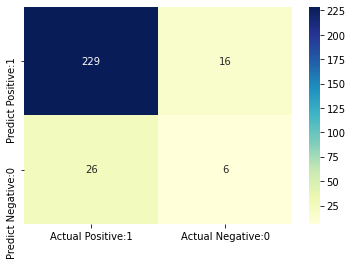

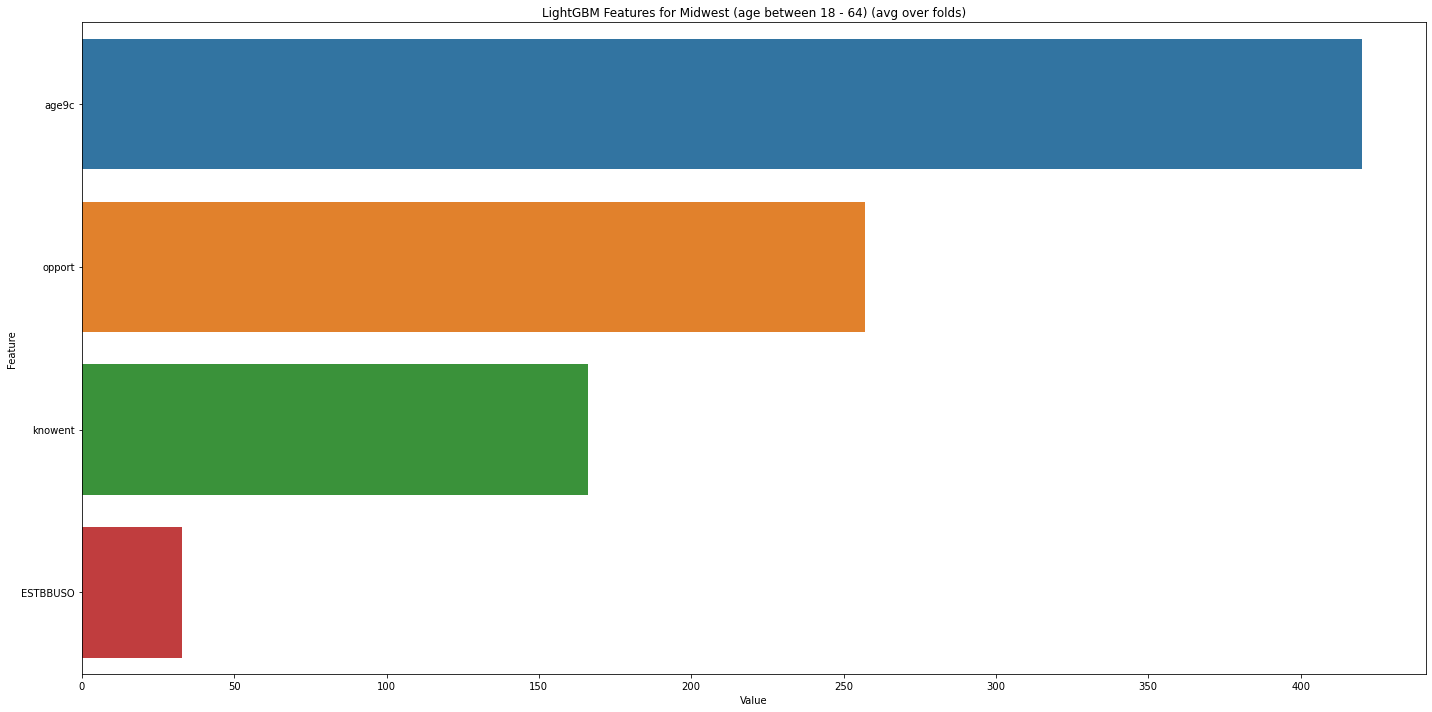

<Figure size 432x288 with 0 Axes>

In [25]:
#pacific northwest with weight L


pacific_northwest_weightL = pd.read_csv("pacific_northwest.csv")

cols = ['TEA','ESTBBUSO', 'age9c','knowent','opport','WEIGHT_L']
pacific_northwest_weightL = pacific_northwest_weightL[cols]
pacific_northwest_weightL['WEIGHT_L'] = pacific_northwest_weightL['WEIGHT_L'].fillna(0)


pacific_northwest_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=pacific_northwest_weightL['TEA']

new_cols = ['ESTBBUSO', 'age9c','knowent','opport','WEIGHT_L']
feature_cols = ['ESTBBUSO', 'age9c','knowent','opport']
x=pacific_northwest_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, pacific_northwest_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')



LightGBM Model accuracy score: 0.8747
Training-set accuracy score: 0.9272
Training set score: 0.9272
Test set score: 0.8747
Confusion matrix

 [[1003   38]
 [ 111   37]]

True Positives(TP) =  1003

True Negatives(TN) =  37

False Positives(FP) =  38

False Negatives(FN) =  111
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1041
           1       0.49      0.25      0.33       148

    accuracy                           0.87      1189
   macro avg       0.70      0.61      0.63      1189
weighted avg       0.85      0.87      0.86      1189



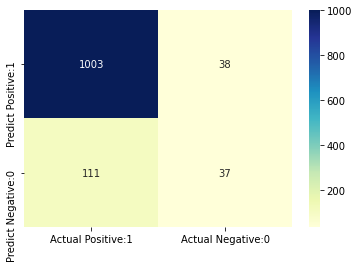

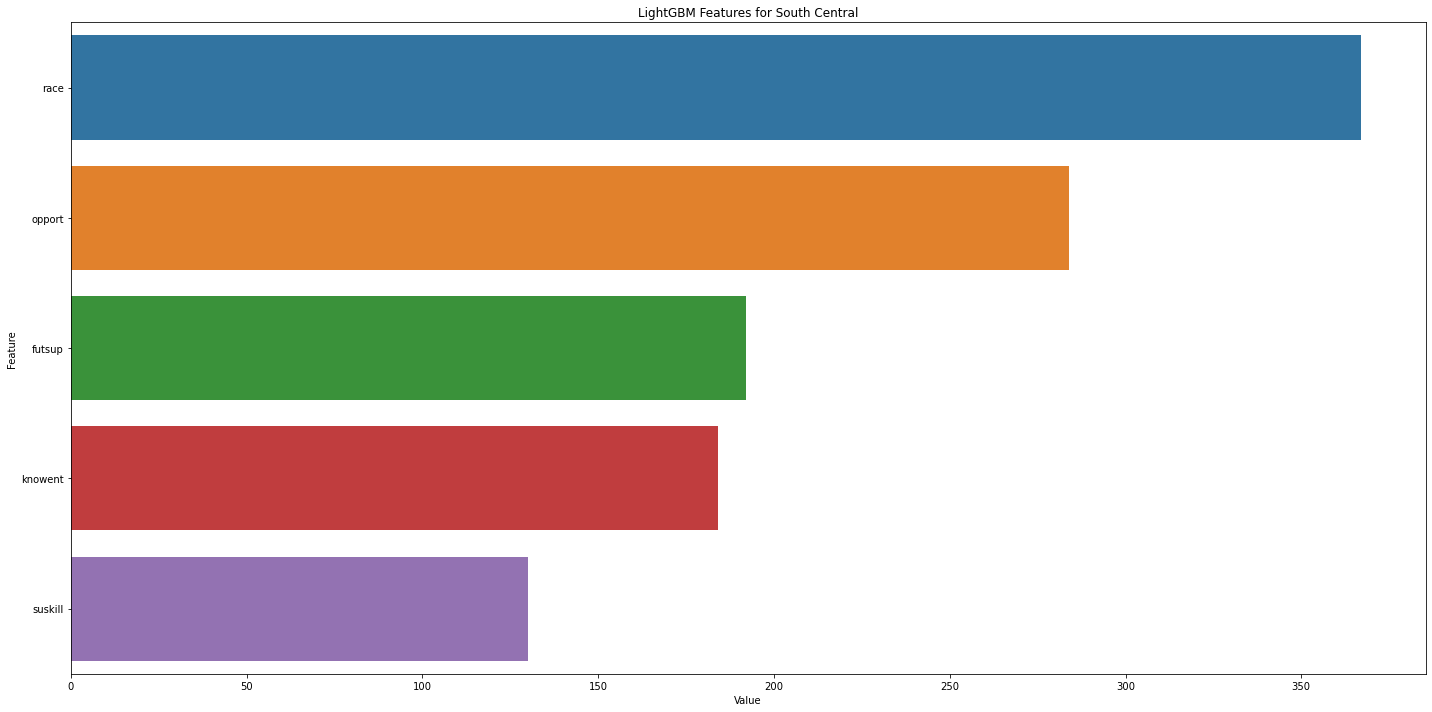

<Figure size 432x288 with 0 Axes>

In [26]:
#pacific southwest with weight A


pacific_southwest = pd.read_csv("pacific_southwest.csv")
cols = ['TEA','race', 'suskill','knowent','opport','futsup','WEIGHT_A']

pacific_southwest = pacific_southwest[cols]
pacific_southwest['TEA'].value_counts()


#Declare feature vector and target variable
y=pacific_southwest['TEA']

new_cols =  ['race', 'suskill','knowent','opport','futsup','WEIGHT_A']
feature_cols = ['race', 'suskill','knowent','opport','futsup']
x=pacific_southwest[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_A']
W_test = X_test['WEIGHT_A']
X_train.drop(columns=['WEIGHT_A'])
X_test.drop(columns=['WEIGHT_A'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,pacific_southwest[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for South Central')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


LightGBM Model accuracy score: 0.8688
Training-set accuracy score: 0.9326
Training set score: 0.9326
Test set score: 0.8688
Confusion matrix

 [[997  44]
 [112  36]]

True Positives(TP) =  997

True Negatives(TN) =  36

False Positives(FP) =  44

False Negatives(FN) =  112
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1041
           1       0.45      0.24      0.32       148

    accuracy                           0.87      1189
   macro avg       0.67      0.60      0.62      1189
weighted avg       0.84      0.87      0.85      1189



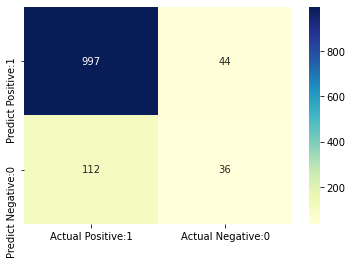

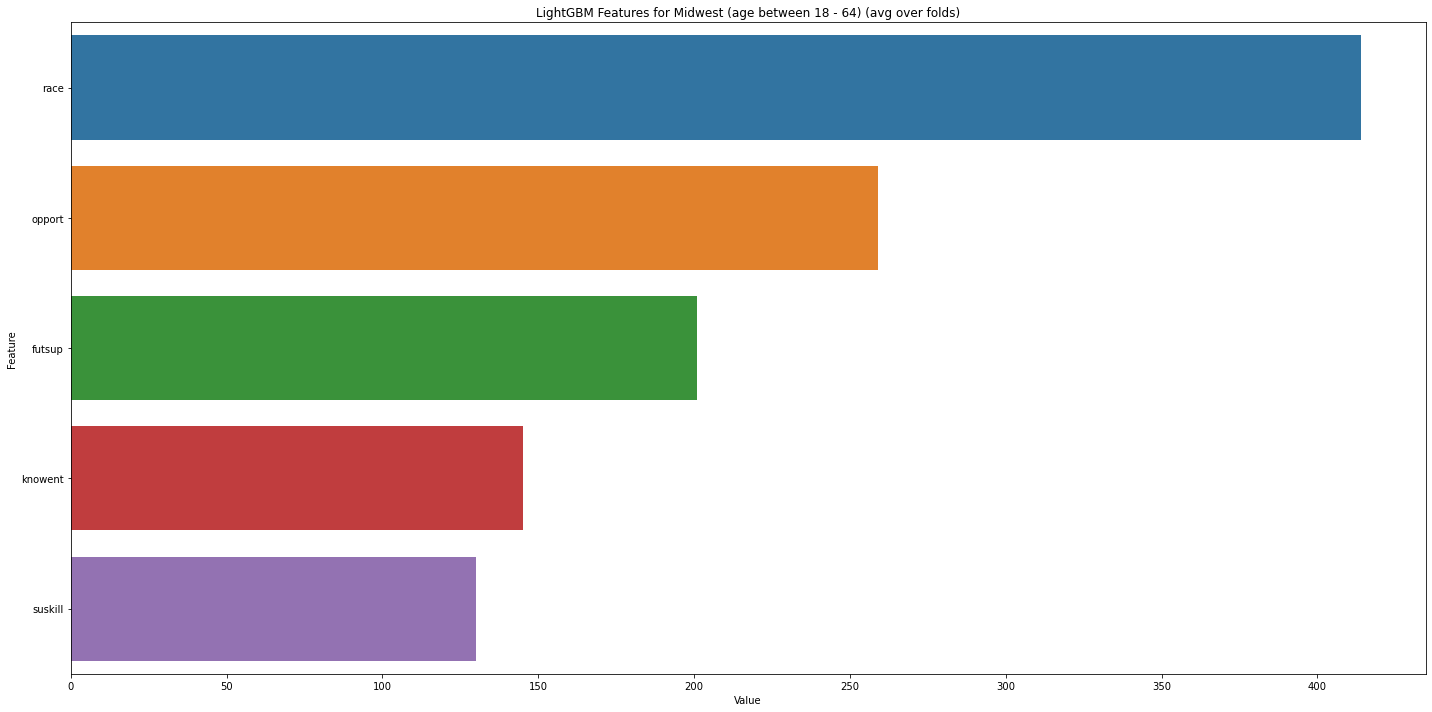

<Figure size 432x288 with 0 Axes>

In [27]:
#pacific northwest with weight L

pacific_southwest_weightL = pd.read_csv("pacific_southwest.csv")
cols = ['TEA','race', 'suskill','knowent','opport','futsup','WEIGHT_L']

pacific_southwest_weightL = pacific_southwest_weightL[cols]
pacific_southwest_weightL['WEIGHT_L'] = pacific_southwest_weightL['WEIGHT_L'].fillna(0)


pacific_southwest_weightL['TEA'].value_counts()


#Declare feature vector and target variable
y=pacific_southwest_weightL['TEA']

new_cols = ['race', 'suskill','knowent','opport','futsup','WEIGHT_L']

feature_cols = ['race', 'suskill','knowent','opport','futsup']
x=pacific_southwest_weightL[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
W_train = X_train['WEIGHT_L']
W_test = X_test['WEIGHT_L']
X_train.drop(columns=['WEIGHT_L'])
X_test.drop(columns=['WEIGHT_L'])


# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,sample_weight = W_train)



# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, pacific_southwest_weightL[feature_cols])), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features for Midwest (age between 18 - 64) (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

